# Initial Statistical Data Analysis

Use exploratory data analysis to summarize the main characteristics of the dataset and understand what the data can tell us beyond the formal modeling or hypothesis testing task. Best initial representation of the univariate feature distributions are bar and histograms.

## Data Visualization

- Distribution of the underlying data, very .
- Bivariate distribution of number_investors predictive power on success rate. 

In [88]:
import datetime, json, warnings
import numpy as np
import pandas as pd
import seaborn as sns
from ast import literal_eval
import matplotlib.pyplot as plt
from IPython.display import display, HTML

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 5] 
warnings.filterwarnings('ignore')

## Dataset Loading 

Loading previously prepared css files which contain the labelled dataset and features of interest.

In [2]:
base_path = '/Users/tejmoxham/Documents/Projects/vela_partners/'

In [73]:
# File path
csv_path = base_path+'/data/moneyball_processed/processed_2022-03-18_07_31_21_midas=10.csv'
df = pd.read_csv(csv_path)

# Display the combined MoneyBall dataframe head
print('Combined MoneyBall Dataframe Shape:', df.shape)
display(HTML(df.head(n=1).to_html()))

Combined MoneyBall Dataframe Shape: (7615, 22)


,universities_of_founders,prev_companies_of_founders,top_popular_prev_comp_flag,top_success_prev_comp_flag,moneyball_prev_comp_success,investor_name,success,qs_universities_of_founders,qs_universities_of_founders_scores,qs_universities_of_founders_score_average,qs_universities_of_founders_score_max,qs_universities_of_founders_score_min,nobrand_investor_name,investor_scores,nobrand_investor_scores,number_investors,average_investor_score,nobrand_average_investor_score,max_investor_score,nobrand_max_investor_score,min_investor_score,nobrand_min_investor_score
0,Brigham Young University (BYU),"['CEO.Com', 'Omniture', 'Omniture', 'Stance', 'XANT.ai']",0,0,0,"['Paul Sagan', 'Mark Gorenberg', 'John Pestana', 'Hiroshi Mikitani', 'Marc Benioff', 'SV Angel', 'Ronald Conway', 'David Lee', 'Jeff Kearl', 'Transmedia Capital', 'Institutional Venture Partners', 'Andreessen Horowitz', 'Steven Singh', 'Hummer Winblad Venture Partners', 'Dan Rose', 'Lars Dalgaard', 'WPP', 'Zetta Venture Partners', 'Benchmark', 'Pelion Venture Partners']",1,['Brigham Young University'],[0.2],0.2,0.2,0.2,"['Paul Sagan', 'Mark Gorenberg', 'John Pestana', 'Hiroshi Mikitani', 'Marc Benioff', 'SV Angel', 'Ronald Conway', 'David Lee', 'Jeff Kearl', 'Transmedia Capital', 'Institutional Venture Partners', 'Steven Singh', 'Hummer Winblad Venture Partners', 'Dan Rose', 'Lars Dalgaard', 'WPP', 'Zetta Venture Partners', 'Pelion Venture Partners']","[0.5134548592078866, nan, nan, nan, 0.4161619674232913, 0.4114882050437383, 0.4998714482492323, 0.4275054133047855, 0.3003012530970266, 0.3032963786434849, 0.4258378202889673, 1.0, nan, nan, 0.4121418764031249, nan, 0.3365824534701194, 0.31804803591117, 1.0, 0.3315871717326701]","[0.5134548592078866, nan, nan, nan, 0.4161619674232913, 0.4114882050437383, 0.4998714482492323, 0.4275054133047855, 0.3003012530970266, 0.3032963786434849, 0.4258378202889673, nan, nan, 0.4121418764031249, nan, 0.3365824534701194, 0.31804803591117, 0.3315871717326701]",20,0.478305,0.391356,1.0,0.513455,0.300301,0.300301


# Success rate

Text(0.5, 0.98, 'Successful/Unsuccessful ')

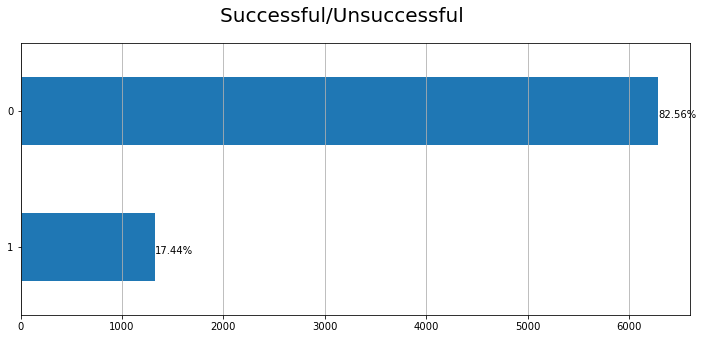

In [74]:
ax = df['success'].value_counts().sort_values().plot(kind="barh")
totals= []

for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, str(round((i.get_width()/total)*100, 2))+'%', fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle('Successful/Unsuccessful ', fontsize=20)

# University of Founders

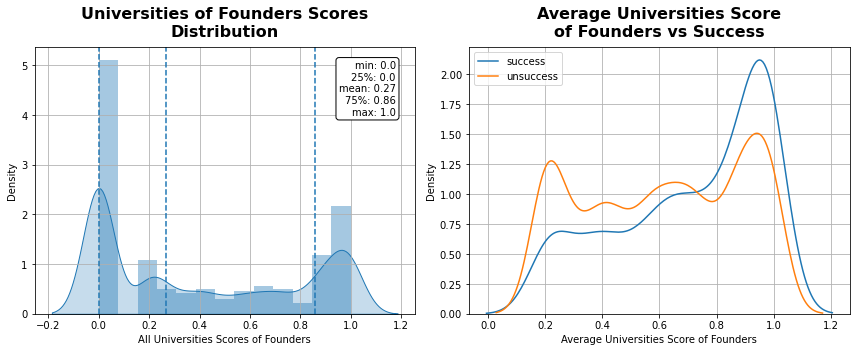

In [351]:
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)

# Overal university scores
x = 'qs_universities_of_founders_scores'
variable = []
for x in df[x].values:
    variable.append(literal_eval(x))
variable = np.array([item for sublist in variable for item in sublist])
ax[0].set_title('Universities of Founders Scores\nDistribution', fontsize=16, fontweight='bold', y=1.02)
breaks = np.quantile(variable, q=np.linspace(variable.min(), variable.max(), 21))
variable = variable[(variable >= breaks[0]) & (variable <= breaks[20]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
ax[0].axvline(np.percentile(variable, 25), ls='--')
ax[0].axvline(np.percentile(variable, 50), ls='--')
ax[0].axvline(np.percentile(variable, 75), ls='--')
ax[0].grid(True)
zmin = round(variable.min(), 2)
zmax = round(variable.max(), 2)
quart25 = round(np.percentile(variable, 25), 2)
mean = round(np.percentile(variable, 50), 2)
quart75 = round(np.percentile(variable, 75), 2)
box = '\n'.join(("min: "+str(zmin), "25%: "+str(quart25), "mean: "+str(mean), "75%: "+str(quart75), "max: "+str(zmax)))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[0].set_xlabel('All Universities Scores of Founders')

# University average score distribution
cat, num = 'success', 'qs_universities_of_founders_score_average'
ax[1].set_title('Average Universities Score\nof Founders vs Success', fontsize=16, fontweight='bold', y=1.02)
labels = ['unsuccess', 'success']
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[1])
ax[1].grid(True)
ax[1].legend()
ax[1].set_xlabel('Average Universities Score of Founders')
plt.tight_layout()

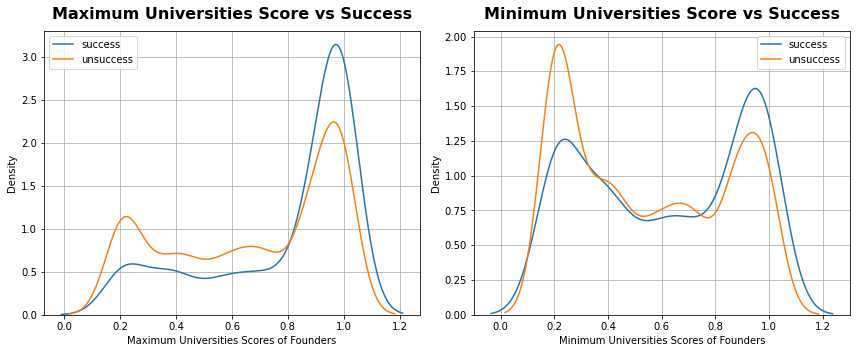

In [297]:
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)

# University maximum score distribution
cat, num = 'success', 'qs_universities_of_founders_score_max'
ax[0].set_title('Maximum Universities Score vs Success', fontsize=16, fontweight='bold', y=1.02)
labels = ['unsuccess', 'success']
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
ax[0].set_xlabel('Maximum Universities Scores of Founders')

# University minimum score distribution
cat, num = 'success', 'qs_universities_of_founders_score_min'
ax[1].set_title('Minimum Universities Score vs Success', fontsize=16, fontweight='bold', y=1.02)
labels = ['unsuccess', 'success']
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[1])
ax[1].grid(True)
ax[1].legend()
ax[1].set_xlabel('Minimum Universities Scores of Founders')
plt.tight_layout()

# Previous Company of Founders

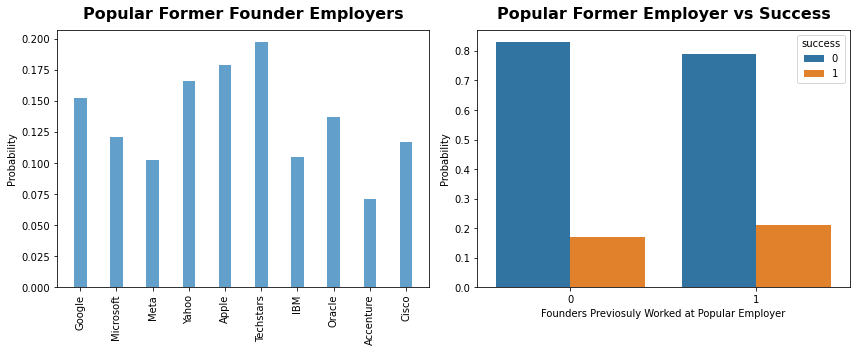

In [296]:
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)

# Top most popular companies and their success rates
names = ['Google', 'Microsoft', 'Meta', 'Yahoo', 'Apple', 'Techstars', 'IBM', 'Oracle', 'Accenture', 'Cisco']
success = [0.15217391304347827, 0.12072892938496584, 0.10204081632653061, 0.16574585635359115, 0.1791907514450867, 0.19727891156462585, 0.1044776119402985, 0.13709677419354838, 0.07079646017699115, 0.11711711711711711]
ax[0].set_title('Popular Former Founder Employers', fontsize=16, fontweight='bold', y=1.02)
ax[0].bar(range(0, len(names)), success, 0.35, alpha=0.7,)
ax[0].set_xticks(range(0, len(names)), names, rotation=90)
ax[0].set_ylabel('Probability')

# Top most popular previous companies vs success  
x, y = "top_popular_prev_comp_flag", "success"
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:'total'})
b = df.groupby([x,y])[y].count().reset_index(name="tot")
b = b.rename(columns={y:'success'}) #
b = b.merge(a, how="left")
b["percent"] = (b['tot']/b["total"])
sns.barplot(x=x, y="percent", hue=y, data=b, ax=ax[1]) #.get_legend().remove()
ax[1].set_title('Popular Former Employer vs Success', fontsize=16, fontweight='bold', y=1.02)
ax[1].set_ylabel('Probability')
ax[1].set_xlabel('Founders Previosuly Worked at Popular Employer')
plt.tight_layout()

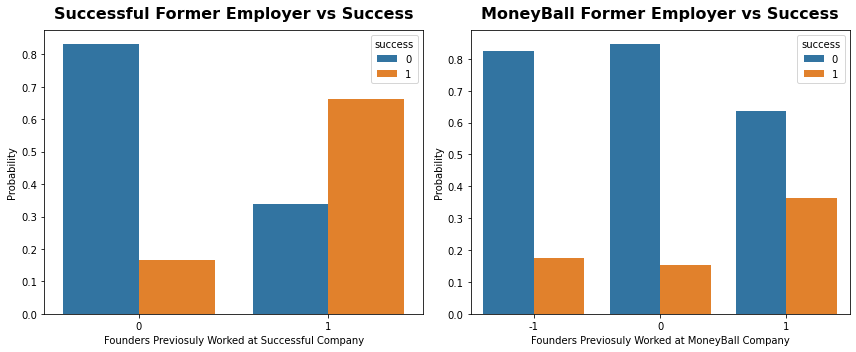

In [293]:
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)

x, y = "top_success_prev_comp_flag", "success"
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:'total'})
b = df.groupby([x,y])[y].count().reset_index(name="tot")
b = b.rename(columns={y:'success'}) #
b = b.merge(a, how="left")
b["percent"] = (b['tot']/b["total"])
sns.barplot(x=x, y="percent", hue=y, data=b, ax=ax[0]) #.get_legend().remove()
ax[0].set_title('Successful Former Employer vs Success', fontsize=16, fontweight='bold', y=1.02)
ax[0].set_ylabel('Probability')
ax[0].set_xlabel('Founders Previosuly Worked at Successful Company')
plt.tight_layout()

x, y = "moneyball_prev_comp_success", "success"
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:'total'})
b = df.groupby([x,y])[y].count().reset_index(name="tot")
b = b.rename(columns={y:'success'}) #
b = b.merge(a, how="left")
b["percent"] = (b['tot']/b["total"])
sns.barplot(x=x, y="percent", hue=y, data=b, ax=ax[1]) #.get_legend().remove()
ax[1].set_title('MoneyBall Former Employer vs Success', fontsize=16, fontweight='bold', y=1.02)
ax[1].set_ylabel('Probability')
ax[1].set_xlabel('Founders Previosuly Worked at MoneyBall Company')
plt.tight_layout()


# Investors Features

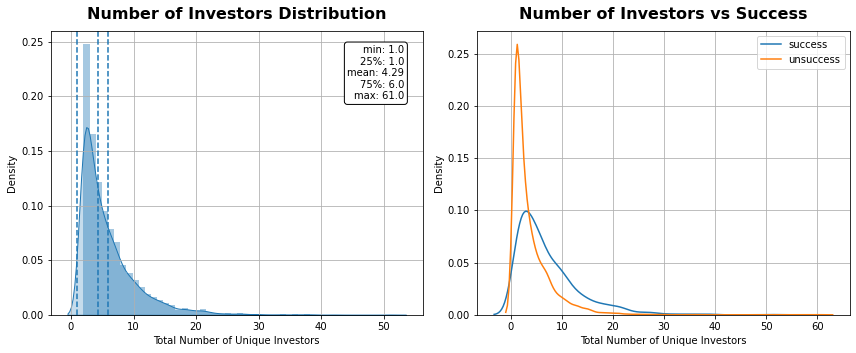

In [348]:

x = 'number_investors'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)

# Number of investor distribution
ax[0].set_title('Number of Investors Distribution', fontsize=16, fontweight='bold', y=1.02)
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[(variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
ax[0].set_xlabel('Total Number of Unique Investors')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

# Number of investor vs success
cat, num = 'success', x
ax[1].set_title('Number of Investors vs Success', fontsize=16, fontweight='bold', y=1.02)
labels = ['unsuccess', 'success']
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[1])
ax[1].grid(True)
ax[1].legend()
ax[1].set_xlabel('Total Number of Unique Investors')
plt.tight_layout()


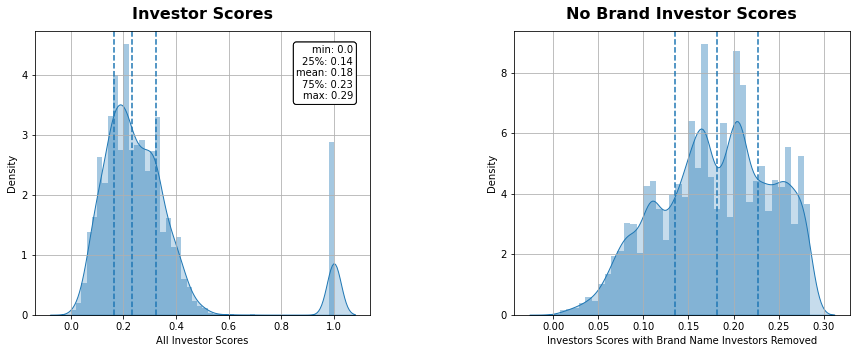

In [333]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)

# Overal investor scores
x = 'investor_scores'
variable = []
for x in df[x].values:
    variable.append(np.fromstring(x.strip("[]"), sep=','))
variable = np.array([item for sublist in variable for item in sublist])
variable = variable[~np.isnan(variable)]
ax[0].set_title('Investor Scores', fontsize=16, fontweight='bold', y=1.02)
breaks = np.quantile(variable, q=np.linspace(variable.min(), variable.max(), 21))
variable = variable[(variable >= breaks[0]) & (variable <= breaks[20]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
ax[0].axvline(np.percentile(variable, 25), ls='--')
ax[0].axvline(np.percentile(variable, 50), ls='--')
ax[0].axvline(np.percentile(variable, 75), ls='--')
ax[0].grid(True)
zmin = round(variable.min(), 2)
zmax = round(variable.max(), 2)
quart25 = round(np.percentile(variable, 25), 2)
mean = round(np.percentile(variable, 50), 2)
quart75 = round(np.percentile(variable, 75), 2)
box = '\n'.join(("min: "+str(zmin), "25%: "+str(quart25), "mean: "+str(mean), "75%: "+str(quart75), "max: "+str(zmax)))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[0].set_xlabel('All Investor Scores')

#Overal nobrand investor scores
x = 'nobrand_investor_scores'
variable = []
for x in df[x].values:
    variable.append(np.fromstring(x.strip("[]"), sep=','))
variable = np.array([item for sublist in variable for item in sublist])
variable = variable[~np.isnan(variable)]
ax[1].set_title('No Brand Investor Scores', fontsize=16, fontweight='bold', y=1.02)
breaks = np.quantile(variable, q=np.linspace(variable.min(), variable.max(), 21))
variable = variable[(variable >= breaks[0]) & (variable <= breaks[20]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[1])
ax[1].axvline(np.percentile(variable, 25), ls='--')
ax[1].axvline(np.percentile(variable, 50), ls='--')
ax[1].axvline(np.percentile(variable, 75), ls='--')
ax[1].grid(True)
zmin = round(variable.min(), 2)
zmax = round(variable.max(), 2)
quart25 = round(np.percentile(variable, 25), 2)
mean = round(np.percentile(variable, 50), 2)
quart75 = round(np.percentile(variable, 75), 2)
box = '\n'.join(("min: "+str(zmin), "25%: "+str(quart25), "mean: "+str(mean), "75%: "+str(quart75), "max: "+str(zmax)))
ax[1].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[1].set_xlabel('Investors Scores with Brand Name Investors Removed')
fig.tight_layout()
plt.show()


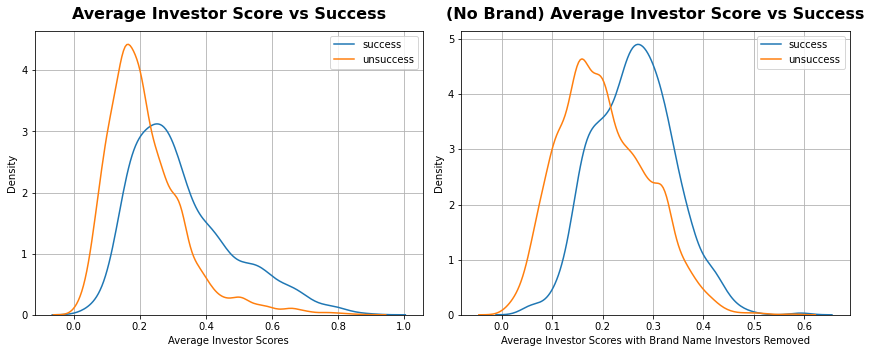

In [338]:
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)

# Investor average score distribution
cat, num = 'success', 'average_investor_score'
ax[0].set_title('Average Investor Score vs Success', fontsize=16, fontweight='bold', y=1.02)
labels = ['unsuccess', 'success']
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
ax[0].set_xlabel('Average Investor Scores')

# No brand investor average score distribution
cat, num = 'success', 'nobrand_average_investor_score'
ax[1].set_title('(No Brand) Average Investor Score vs Success', fontsize=16, fontweight='bold', y=1.02)
labels = ['unsuccess', 'success']
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[1])
ax[1].grid(True)
ax[1].legend()
ax[1].set_xlabel('Average Investor Scores with Brand Name Investors Removed')
plt.tight_layout()

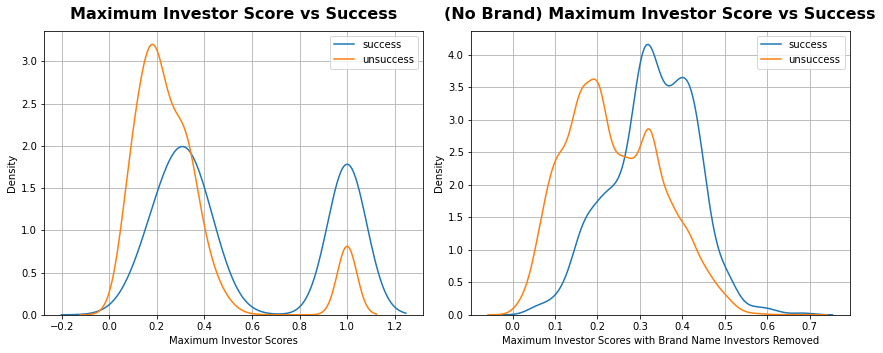

In [343]:
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)

# Investor maximum score distribution
cat, num = 'success', 'max_investor_score'
ax[0].set_title('Maximum Investor Score vs Success', fontsize=16, fontweight='bold', y=1.02)
labels = ['unsuccess', 'success']
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
ax[0].set_xlabel('Maximum Investor Scores')

# No brand investors maximum score distribution
cat, num = 'success', 'nobrand_max_investor_score'
ax[1].set_title('(No Brand) Maximum Investor Score vs Success', fontsize=16, fontweight='bold', y=1.02)
labels = ['unsuccess', 'success']
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[1])
ax[1].grid(True)
ax[1].legend()
ax[1].set_xlabel('Maximum Investor Scores with Brand Name Investors Removed')
plt.tight_layout()

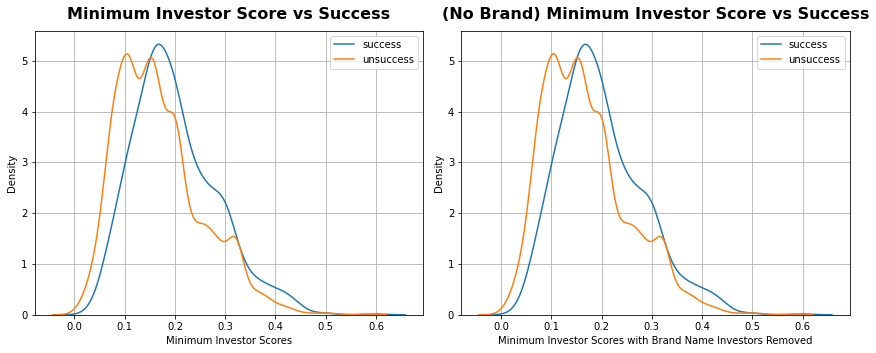

In [344]:
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)

# Investor minimum score distribution
cat, num = 'success', 'min_investor_score'
ax[0].set_title('Minimum Investor Score vs Success', fontsize=16, fontweight='bold', y=1.02)
labels = ['unsuccess', 'success']
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
ax[0].set_xlabel('Minimum Investor Scores')

# No brand investors minimum score distribution
cat, num = 'success', 'nobrand_min_investor_score'
ax[1].set_title('(No Brand) Minimum Investor Score vs Success', fontsize=16, fontweight='bold', y=1.02)
labels = ['unsuccess', 'success']
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[1])
ax[1].grid(True)
ax[1].legend()
ax[1].set_xlabel('Minimum Investor Scores with Brand Name Investors Removed')
plt.tight_layout()

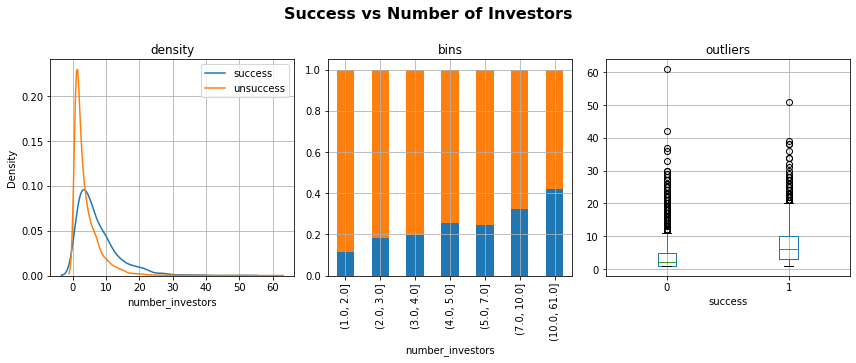

In [193]:
cat, num = 'success', 'number_investors'
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
# distribution
ax[0].title.set_text('density')
labels = ['unsuccess', 'success']
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
# stacked
breaks = np.quantile(df[num], q=np.linspace(0, 1, 11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=False, grid=True, ax=ax[1], title='bins')
ax[1].title.set_text('bins')
# outliers
df.boxplot(column='number_investors', by='success', ax=ax[2])
ax[2].set_title('outliers')
fig.suptitle('Success vs Number of Investors', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

### Average Investor Score

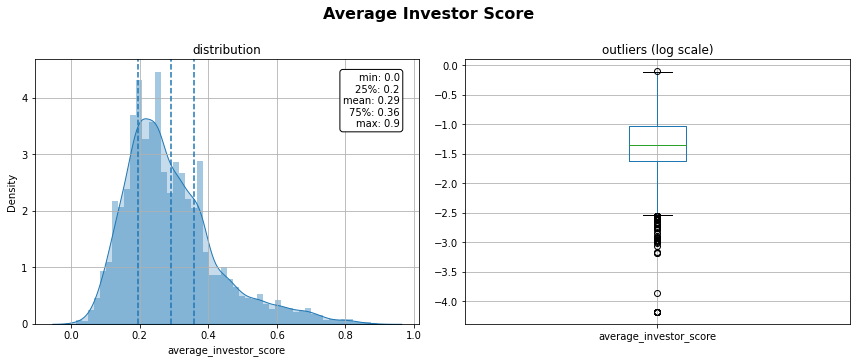

In [187]:
x = 'average_investor_score'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[(variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[1].title.set_text('outliers (log scale)')
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
fig.suptitle('Average Investor Score', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

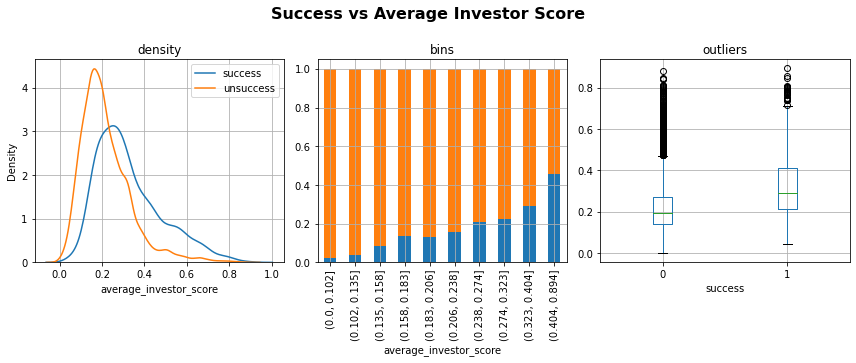

In [38]:
cat, num = 'success', 'average_investor_score'

fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
# distribution
ax[0].title.set_text('density')
labels = ['unsuccess', 'success']
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
# stacked
breaks = np.quantile(df[num], q=np.linspace(0, 1, 11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=False, grid=True, ax=ax[1], title='bins')
ax[1].title.set_text('bins')
# outliers
df.boxplot(column=num, by='success', ax=ax[2])
ax[2].set_title('outliers')
fig.suptitle('Success vs Average Investor Score', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

### Average Investor Score (No Brand Investors)

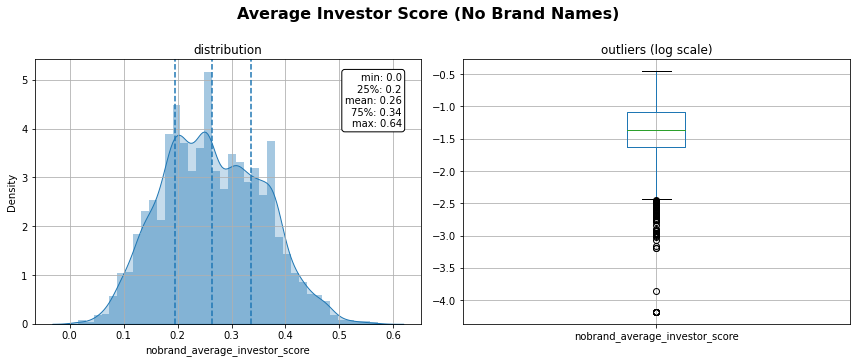

In [190]:
x = 'nobrand_average_investor_score'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[(variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[1].title.set_text('outliers (log scale)')
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
fig.suptitle('Average Investor Score (No Brand Names)', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

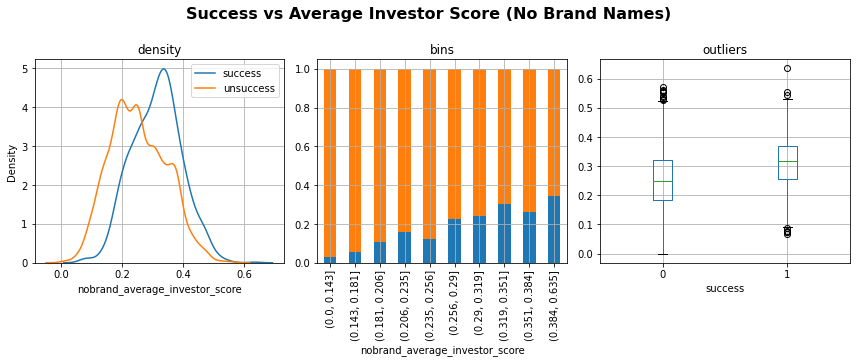

In [219]:
cat, num = 'success', 'nobrand_average_investor_score'

fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
# distribution
labels = ['unsuccess', 'success']
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
# stacked
breaks = np.quantile(df[num], q=np.linspace(0, 1, 11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=False, grid=True, ax=ax[1], title='bins')
ax[1].title.set_text('bins')
# outliers
df.boxplot(column=num, by='success', ax=ax[2])
ax[2].set_title('outliers')
fig.suptitle('Success vs Average Investor Score (No Brand Names)', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

### Maximum Investor Score

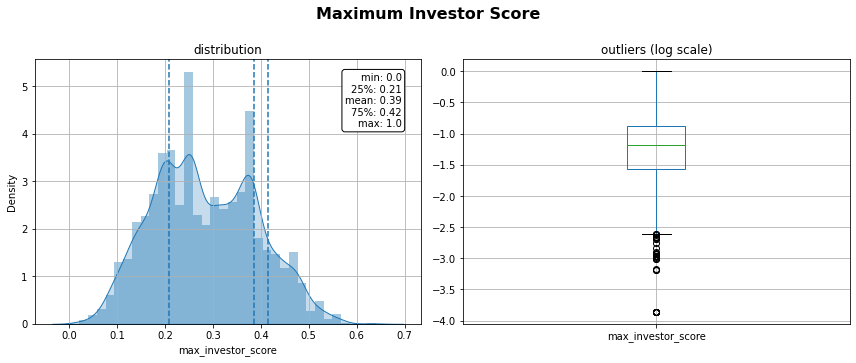

In [198]:
x = 'max_investor_score'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[(variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[1].title.set_text('outliers (log scale)')
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
fig.suptitle('Maximum Investor Score', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

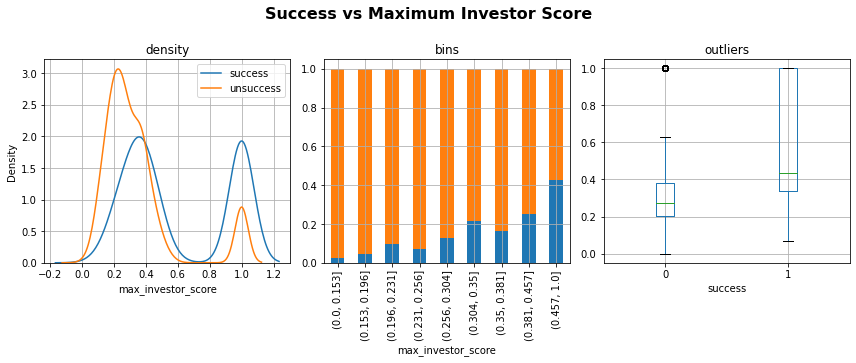

In [199]:
cat, num = 'success', 'max_investor_score'

fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
# distribution
labels = ['unsuccess', 'success']
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
# stacked
breaks = np.quantile(df[num], q=np.linspace(0, 1, 11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=False, grid=True, ax=ax[1], title='bins')
ax[1].title.set_text('bins')
# outliers
df.boxplot(column=num, by='success', ax=ax[2])
ax[2].set_title('outliers')
fig.suptitle('Success vs Maximum Investor Score', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

### Maximum Investor Score (No Brand Investors)

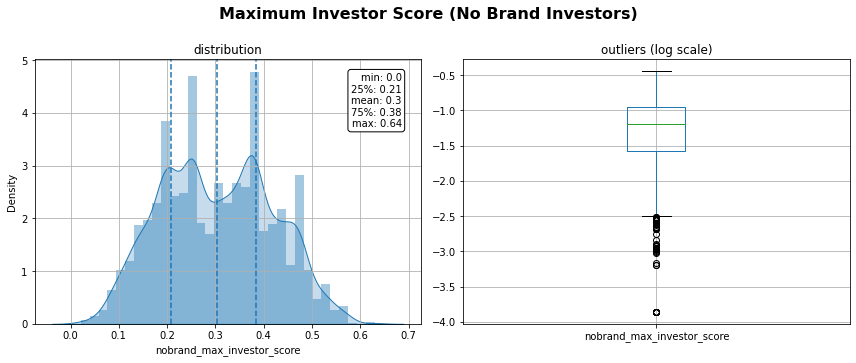

In [200]:
x = 'nobrand_max_investor_score'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[(variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[1].title.set_text('outliers (log scale)')
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
fig.suptitle('Maximum Investor Score (No Brand Investors)', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

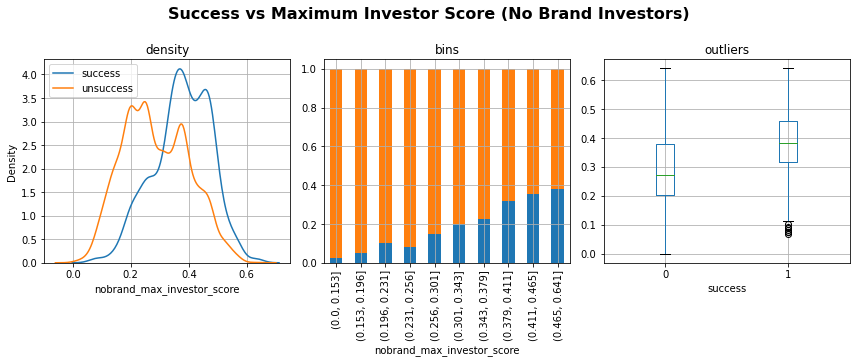

In [201]:
cat, num = 'success', 'nobrand_max_investor_score'
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
# distribution
labels = ['unsuccess', 'success']
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
# stacked
breaks = np.quantile(df[num], q=np.linspace(0, 1, 11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=False, grid=True, ax=ax[1], title='bins')
ax[1].title.set_text('bins')
# outliers
df.boxplot(column=num, by='success', ax=ax[2])
ax[2].set_title('outliers')
fig.suptitle('Success vs Maximum Investor Score (No Brand Investors)', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

### Minimum Investor Score

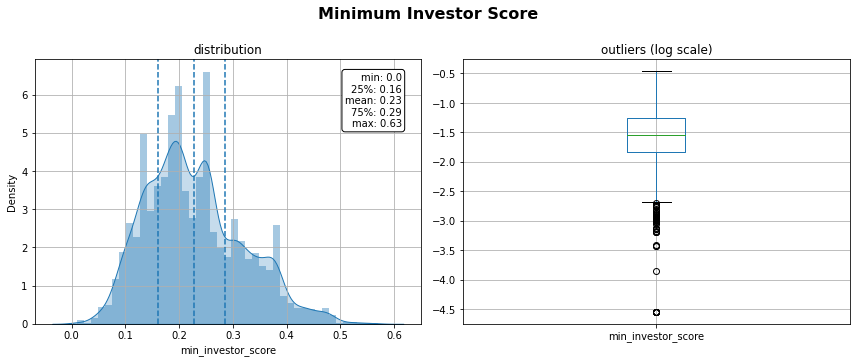

In [202]:
x = 'min_investor_score'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[(variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[1].title.set_text('outliers (log scale)')
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
fig.suptitle('Minimum Investor Score', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

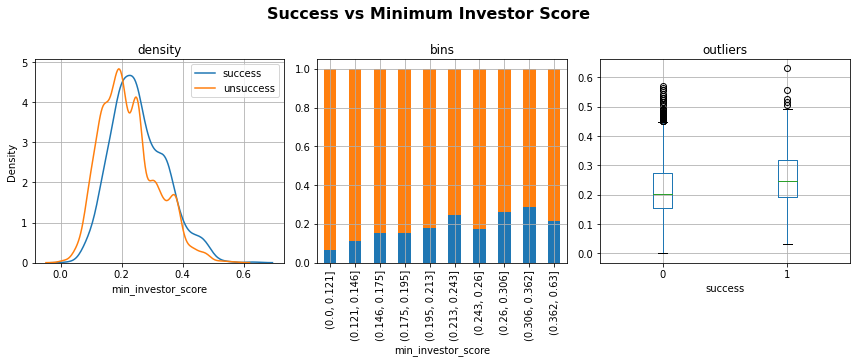

In [203]:
cat, num = 'success', 'min_investor_score'
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
# distribution
labels = ['unsuccess', 'success']
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
# stacked
breaks = np.quantile(df[num], q=np.linspace(0, 1, 11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=False, grid=True, ax=ax[1], title='bins')
ax[1].title.set_text('bins')
# outliers
df.boxplot(column=num, by='success', ax=ax[2])
ax[2].set_title('outliers')
fig.suptitle('Success vs Minimum Investor Score', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

### Minimum Investor Score (No Brand Investors)

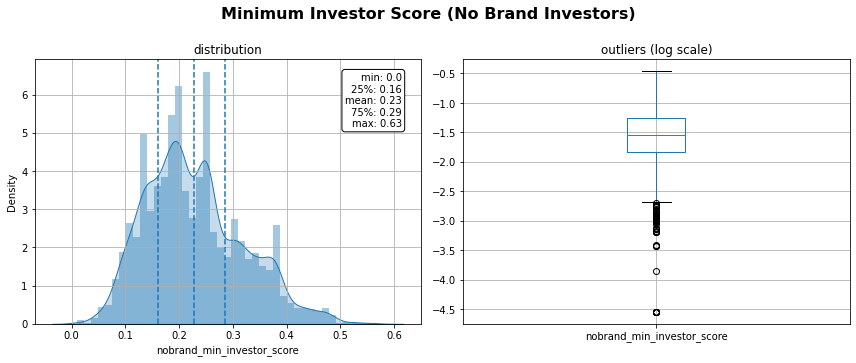

In [204]:
x = 'nobrand_min_investor_score'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[(variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[1].title.set_text('outliers (log scale)')
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
fig.suptitle('Minimum Investor Score (No Brand Investors)', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

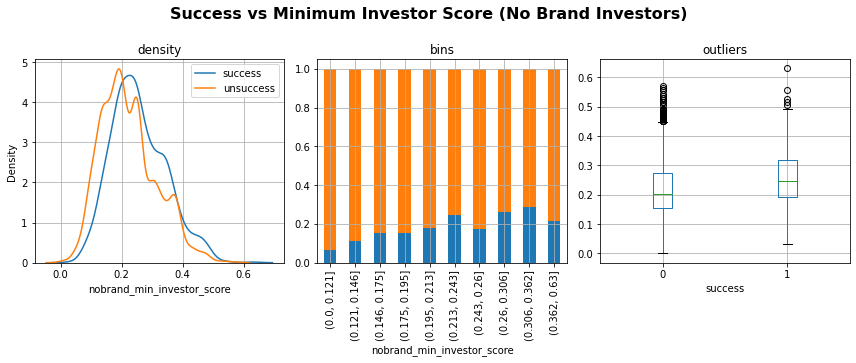

In [205]:
cat, num = 'success', 'nobrand_min_investor_score'
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
# distribution
labels = ['unsuccess', 'success']
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
# stacked
breaks = np.quantile(df[num], q=np.linspace(0, 1, 11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=False, grid=True, ax=ax[1], title='bins')
ax[1].title.set_text('bins')
# outliers
df.boxplot(column=num, by='success', ax=ax[2])
ax[2].set_title('outliers')
fig.suptitle('Success vs Minimum Investor Score (No Brand Investors)', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

### Number of investors with threshold scores 

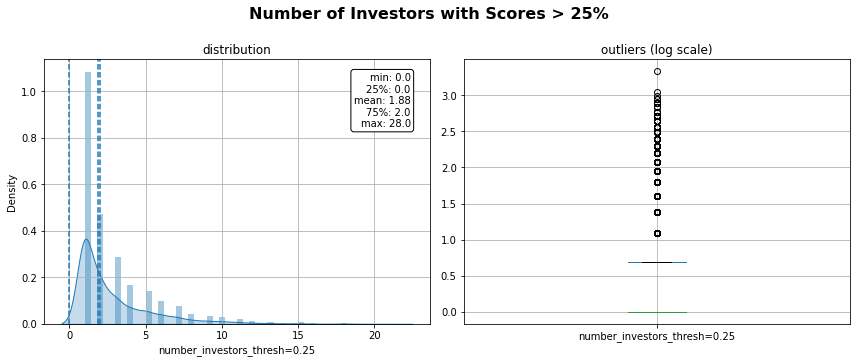

In [228]:
thresh = 0.25
x = 'number_investors_thresh='+str(thresh)
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[(variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[1].title.set_text('outliers (log scale)')
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
fig.suptitle('Number of Investors with Scores > {}%'.format(int(thresh*100)), fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

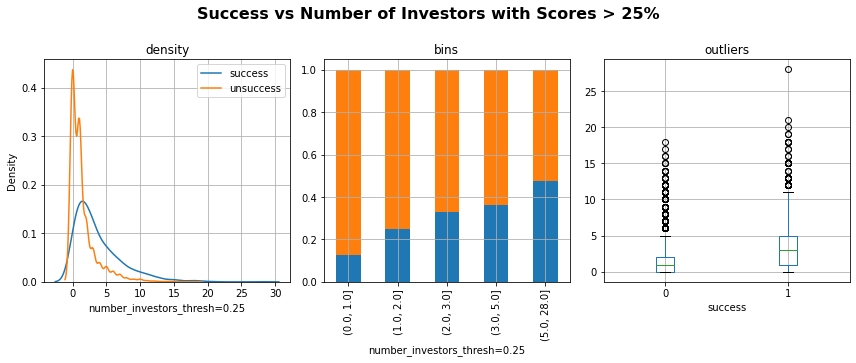

In [229]:
thresh = 0.25
cat, num = 'success', 'number_investors_thresh='+str(thresh)
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
# distribution
labels = ['unsuccess', 'success']
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
# stacked
breaks = np.quantile(df[num], q=np.linspace(0, 1, 11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=False, grid=True, ax=ax[1], title='bins')
ax[1].title.set_text('bins')
# outliers
df.boxplot(column=num, by='success', ax=ax[2])
ax[2].set_title('outliers')
fig.suptitle('Success vs Number of Investors with Scores > {}%'.format(int(thresh*100)), fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

### Number of Investors with Threshold Scores (No Brand Names)

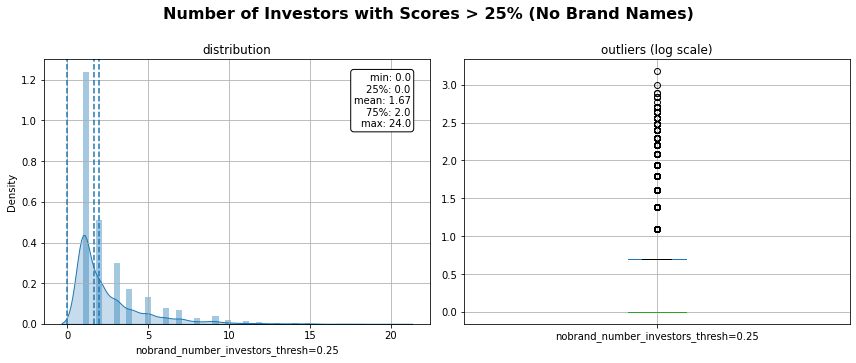

In [230]:
thresh = 0.25
x = 'nobrand_number_investors_thresh='+str(thresh)
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[(variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax[1].title.set_text('outliers (log scale)')
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
fig.suptitle('Number of Investors with Scores > {}% (No Brand Names)'.format(int(thresh*100)), fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

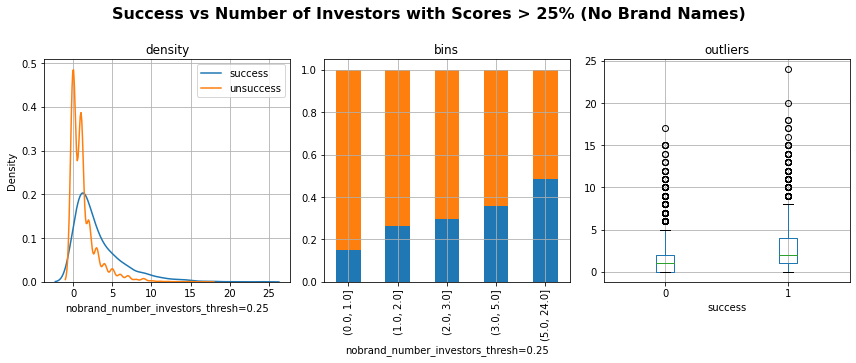

In [237]:
thresh = 0.25
cat, num = 'success', 'nobrand_number_investors_thresh='+str(thresh)
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
# distribution
labels = ['unsuccess', 'success']
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=labels[i], ax=ax[0])
ax[0].grid(True)
ax[0].legend()
# stacked
breaks = np.quantile(df[num], q=np.linspace(0, 1, 11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=False, grid=True, ax=ax[1], title='bins')
ax[1].title.set_text('bins')
# outliers
df.boxplot(column=num, by='success', ax=ax[2])
ax[2].set_title('outliers')
fig.suptitle('Success vs Number of Investors with Scores > {}% (No Brand Names)'.format(int(thresh*100)), fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()

## Conclusions & Remarks
- Removal of the brand name investor gives two clear distributions for the success and unsuccess labels for average investor score. The overall distribution is also more normal rather than positively skewed left. Greater distinction between outliers.
- Minimum investor score and no brand name minimum investor score are the same dataset. 
- Success/unsuccessful datasets are not evenly distributed so should use model class weights when training our models if possible.
- Number of investors: Very positively skewed towards a small number of investors.